In [1]:
#Import Required Libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

C:\Users\awhit\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#load Brain Stroke dataset
brainstroke = pd.read_csv('brainstroke.csv')

In [3]:
#How many rows/columns?
brainstroke.shape

(4981, 11)

In [4]:
#Check the first few rows of data
brainstroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
#Check for Missing Data
brainstroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# Summary Statistics - Continuous
brainstroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
#Summary Statistics - Categorical
brainstroke[['gender','ever_married','work_type','Residence_type','smoking_status']].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


<AxesSubplot:>

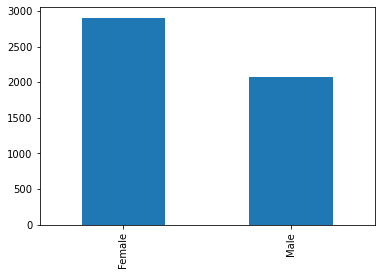

In [8]:
#Categorical Variables - Univariate
#Gender
brainstroke['gender'].value_counts().plot.bar()


<AxesSubplot:>

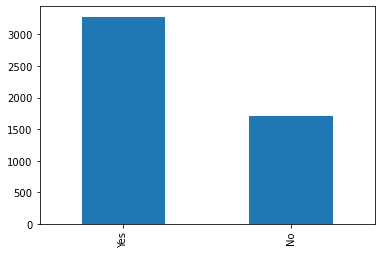

In [9]:
#Categorical Variables - Univariate
#Ever_married
brainstroke['ever_married'].value_counts().plot.bar()

<AxesSubplot:>

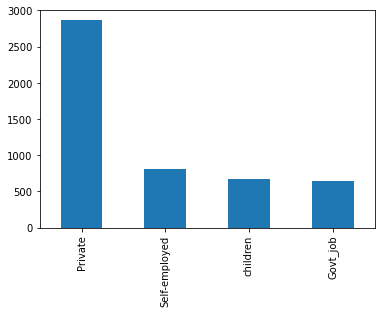

In [10]:
#Categorical Variables - Univariate
#work_type
brainstroke['work_type'].value_counts().plot.bar()

<AxesSubplot:>

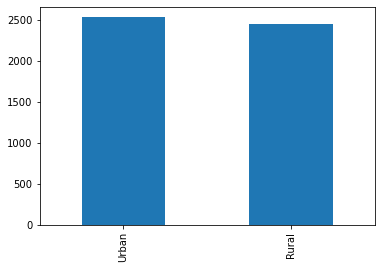

In [11]:
#Categorical Variables - Univariate
#Residence_type
brainstroke['Residence_type'].value_counts().plot.bar()

<AxesSubplot:>

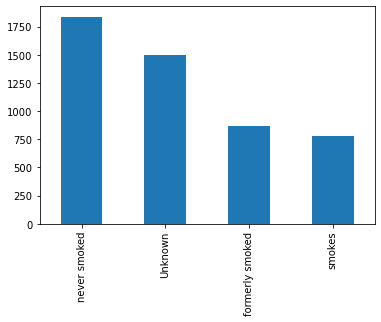

In [12]:
#Categorical Variables - Univariate
#Smoking Status
brainstroke['smoking_status'].value_counts().plot.bar()

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

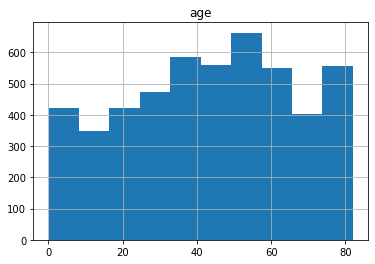

In [13]:
#Continuous Variables - Univariate
#Age
brainstroke.hist(column='age')

array([[<AxesSubplot:title={'center':'hypertension'}>]], dtype=object)

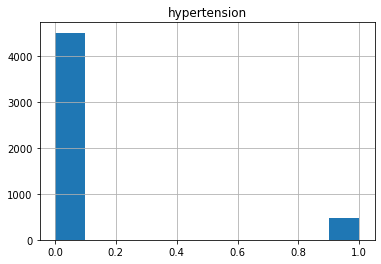

In [14]:
#Continuous Variables - Univariate
#hypertension
brainstroke.hist(column='hypertension')

array([[<AxesSubplot:title={'center':'heart_disease'}>]], dtype=object)

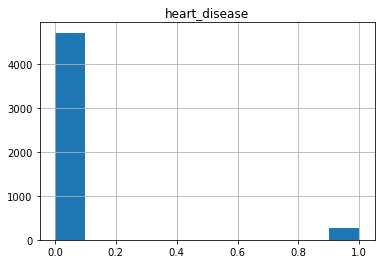

In [15]:
#Continuous Variables - Univariate
#heart_disease
brainstroke.hist(column='heart_disease')

array([[<AxesSubplot:title={'center':'avg_glucose_level'}>]], dtype=object)

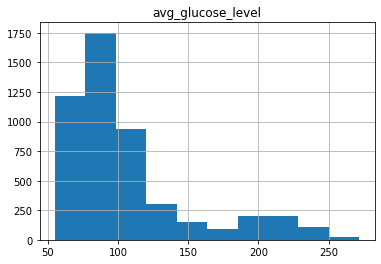

In [16]:
#Continuous Variables - Univariate
#Avg_glucose_level
brainstroke.hist(column='avg_glucose_level')

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

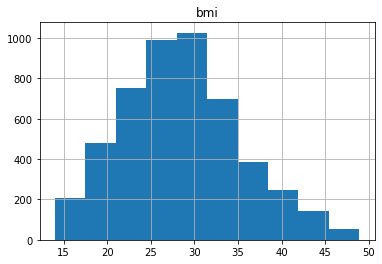

In [17]:
#Continuous Variables - Univariate
#BMI
brainstroke.hist(column='bmi')

array([[<AxesSubplot:title={'center':'stroke'}>]], dtype=object)

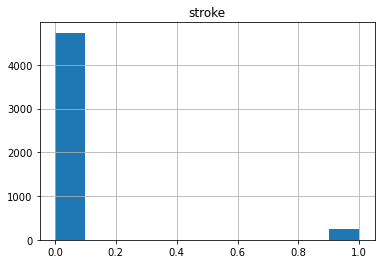

In [18]:
#Continuous Variables - Univariate
#Stroke
brainstroke.hist(column='stroke')

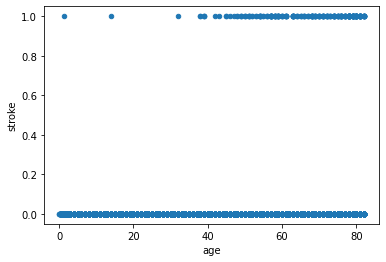

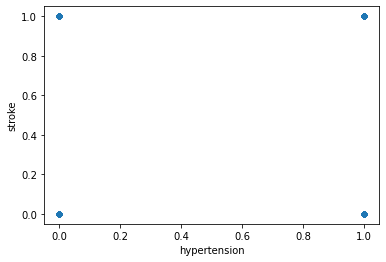

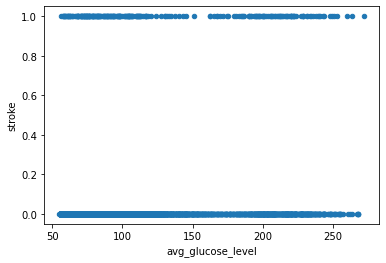

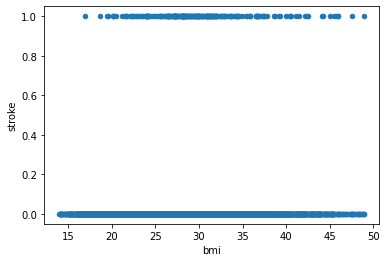

In [39]:
#Continuous Variables - Bivariate
brainstroke.plot.scatter(x = 'age', y = 'stroke');
brainstroke.plot.scatter(x = 'hypertension', y = 'stroke');
brainstroke.plot.scatter(x = 'avg_glucose_level', y = 'stroke');
brainstroke.plot.scatter(x = 'bmi', y = 'stroke');


<AxesSubplot:xlabel='gender'>

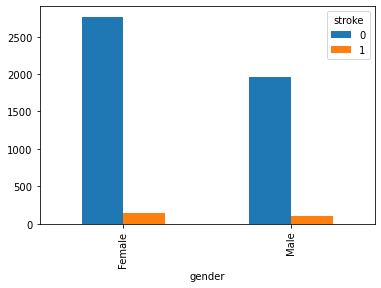

In [20]:
#Categorical Variables - Bivariate
#Gender - stroke
pd.crosstab(brainstroke.gender,brainstroke.stroke).plot(kind = 'bar')

<AxesSubplot:xlabel='ever_married'>

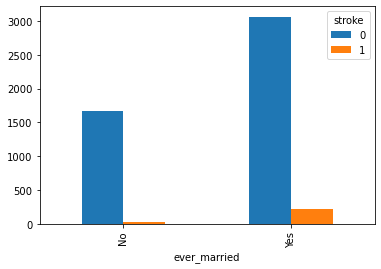

In [21]:
#Categorical Variables - Bivariate
#ever_married - stroke
pd.crosstab(brainstroke.ever_married,brainstroke.stroke).plot(kind = 'bar')

<AxesSubplot:xlabel='work_type'>

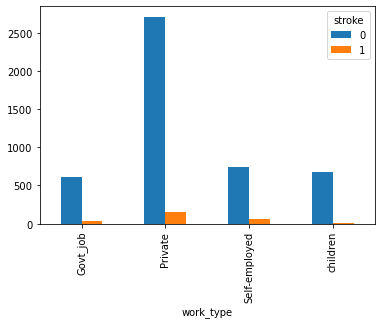

In [22]:
#Categorical Variables - Bivariate
#work_type - stroke
pd.crosstab(brainstroke.work_type,brainstroke.stroke).plot(kind = 'bar')

<AxesSubplot:xlabel='Residence_type'>

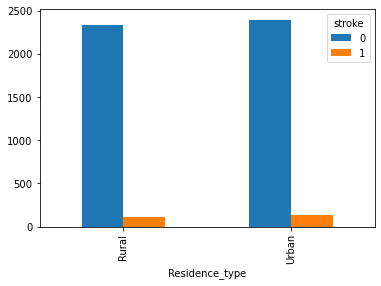

In [23]:
#Categorical Variables - Bivariate
#Residence_type - stroke
pd.crosstab(brainstroke.Residence_type,brainstroke.stroke).plot(kind = 'bar')

<AxesSubplot:xlabel='smoking_status'>

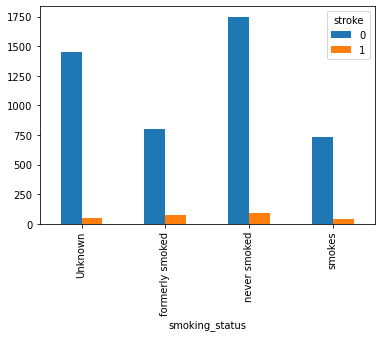

In [24]:
#Categorical Variables - Bivariate
#smoking_status - stroke
pd.crosstab(brainstroke.smoking_status,brainstroke.stroke).plot(kind = 'bar')

<AxesSubplot:xlabel='hypertension'>

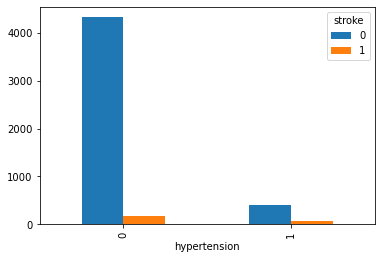

In [25]:
#Categorical Variables - Bivariate
#hypertension - stroke
pd.crosstab(brainstroke.hypertension,brainstroke.stroke).plot(kind = 'bar')

In [26]:
#Dummy Variables of Categorical Variables
CatPrefix = ['gender','ever_married','work_type','Residence_type','smoking_status']
#Remove 1 dummy each for each column to prevent Dummy Trap
Strokedummies = pd.get_dummies(brainstroke[CatPrefix], prefix = CatPrefix)
DummyStroke= pd.concat([brainstroke,Strokedummies], axis = 'columns')
StrokeFinal = DummyStroke.drop(['gender','ever_married','work_type','Residence_type','smoking_status','gender_Male','ever_married_No','work_type_Private','Residence_type_Urban','smoking_status_smokes'],axis = 'columns')
StrokeFinal.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked'],
      dtype='object')

In [27]:
StrokeFinal.rename(columns={'smoking_status_formerly smoked':'smoking_status_formerlysmoked','smoking_status_never smoked':'smoking_status_neversmoked','work_type_Self-employed':'work_type_Selfemployed'}, inplace=True)


In [29]:
#Create arrays for the features and the response variable
y = StrokeFinal['stroke'].values
X = StrokeFinal[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Selfemployed', 'work_type_children', 'Residence_type_Rural',
       'smoking_status_Unknown', 'smoking_status_formerlysmoked',
       'smoking_status_neversmoked']].values

In [30]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)
#Provide a copy of training and test data sets
pd.DataFrame(X_train).to_csv("StrokeXTrain.csv")
pd.DataFrame(X_test).to_csv('StrokeXTest.csv')
pd.DataFrame(y_train).to_csv("StrokeYTrain.csv")
pd.DataFrame(y_test).to_csv("StrokeYTest.csv")

In [31]:
# Setup arrays to store train and test accuracies

neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


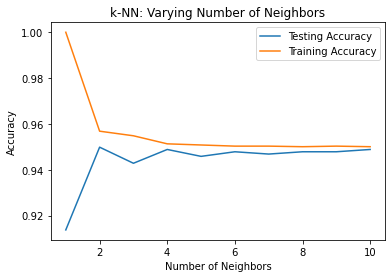

In [32]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [33]:
#Create a k-NN classifier with 2 neighbors
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [35]:
y_pred = knn.predict(X_test)
# Generate the confusion matrix and classification report
confmatrix = confusion_matrix(y_test,y_pred)
print(confmatrix)

[[946   1]
 [ 49   1]]


In [36]:
TN = confmatrix[0,0]
TP = confmatrix[1,1]
FN = confmatrix[1,0]
FP = confmatrix[0,1]

# Calculate and print the accuracy
Accuracy = (TN + TP) / (TN + FN + FP + TP)
print("Accuracy", Accuracy)

# Calculate and print the sensitivity/recall
Sensitivity = TP / (TP + FN)
print("Sensitivity/Recall", Sensitivity)

# Calculate and print the specificity
Specificity = TN / (TN + FP)
print("Specificity", Specificity)

#Calculate and print the precision
Precision = TP/(TP + FP)
print("Precision",Precision)


Accuracy 0.9498495486459378
Sensitivity/Recall 0.02
Specificity 0.9989440337909187
Precision 0.5


In [37]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.5369693769799366
